# Important Libraries

In [1]:
import os
import requests
import zipfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



# 1- Data Collection :
Sourcse of Data is from MovieLens 📊 (https://grouplens.org/datasets/movielens/) or scrape data from IMDb/TMDB API.

In [2]:
def download_and_extract_movielens(destination="data"):
    #URL from MovieLens
    url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
    zip_path = os.path.join(destination, "ml-latest-small.zip")
    extract_path = os.path.join(destination, "ml-latest-small")

    #Create data directory
    os.makedirs(destination, exist_ok=True)

    #Download if not already downloaded
    if not os.path.exists(zip_path):
        print("Downloading MovieLens dataset...")
        response = requests.get(url)
        with open(zip_path, "wb") as f:
            f.write(response.content)
        print("Download completed.")

    #Extract zip
    if not os.path.exists(extract_path):
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(destination)
        print("Extraction completed.")

    return extract_path

#Download and extract
dataset_path = download_and_extract_movielens()

#Load CSV into DataFrames
ratings = pd.read_csv(os.path.join(dataset_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(dataset_path, "movies.csv"))
tags = pd.read_csv(os.path.join(dataset_path, "tags.csv"))
links = pd.read_csv(os.path.join(dataset_path, "links.csv"))

#Check first few rows
print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# 2 - Exploratory Data Analysis (EDA)
- Understanding dataset shapes and column types
- Rating distribution
- Number of ratings per user and per movie
- Popular movies
- Genre distribution
- Tag insights (optional, useful for content-based filtering)

1. Basic Info & Shape & Missing Values

In [7]:
# Basic info
print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Tags:", tags.shape)
print("Links:", links.shape)

# Check for nulls
print("\nMissing values:")
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(tags.isnull().sum())


Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)
Links: (9742, 3)

Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


2. Rating Distribution

In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


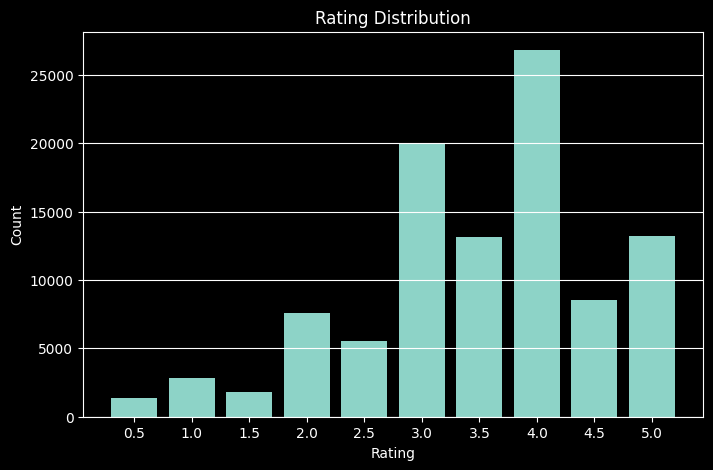

In [9]:
# Count ratings and sort by value
rating_counts = ratings['rating'].value_counts().sort_index()

# Plot using matplotlib directly
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


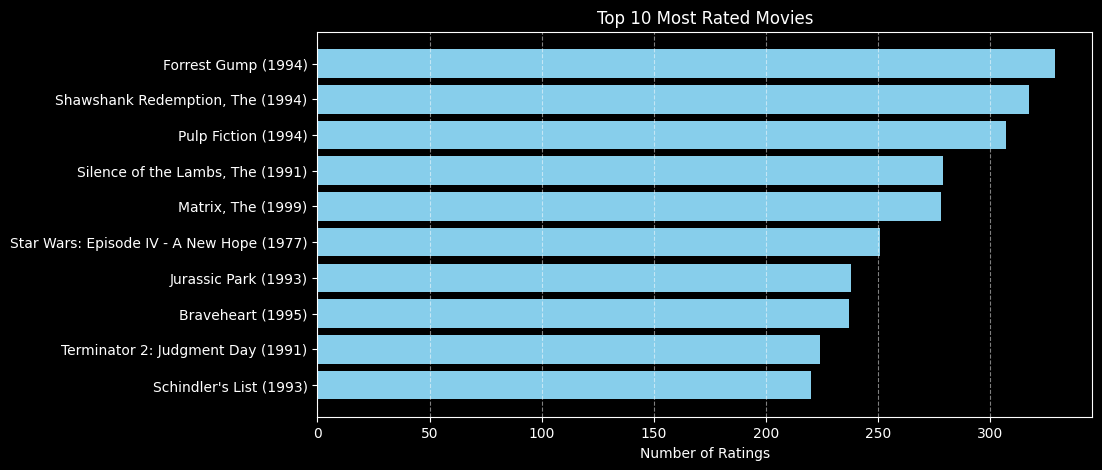

In [10]:
most_rated = ratings['movieId'].value_counts().head(10)
top_movies = movies[movies['movieId'].isin(most_rated.index)]

titles = top_movies.set_index('movieId').loc[most_rated.index]['title']
counts = most_rated.values

plt.figure(figsize=(10, 5))
plt.barh(titles, counts, color='skyblue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


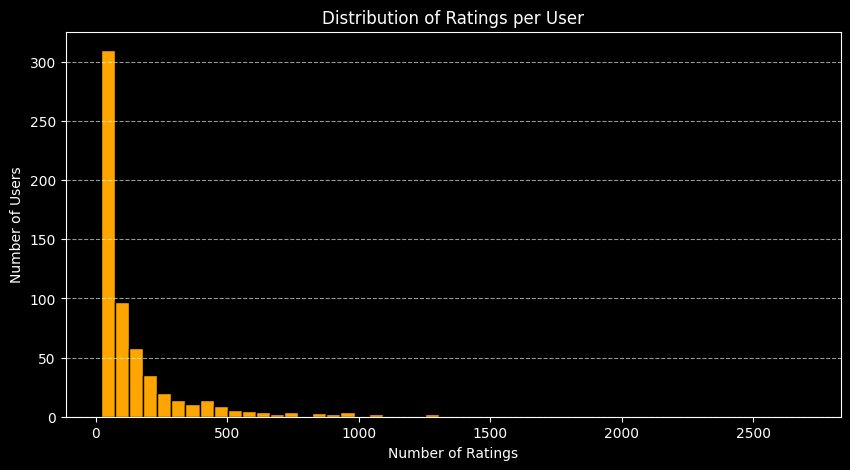

In [11]:
user_activity = ratings.groupby('userId').size()

plt.figure(figsize=(10, 5))
plt.hist(user_activity, bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


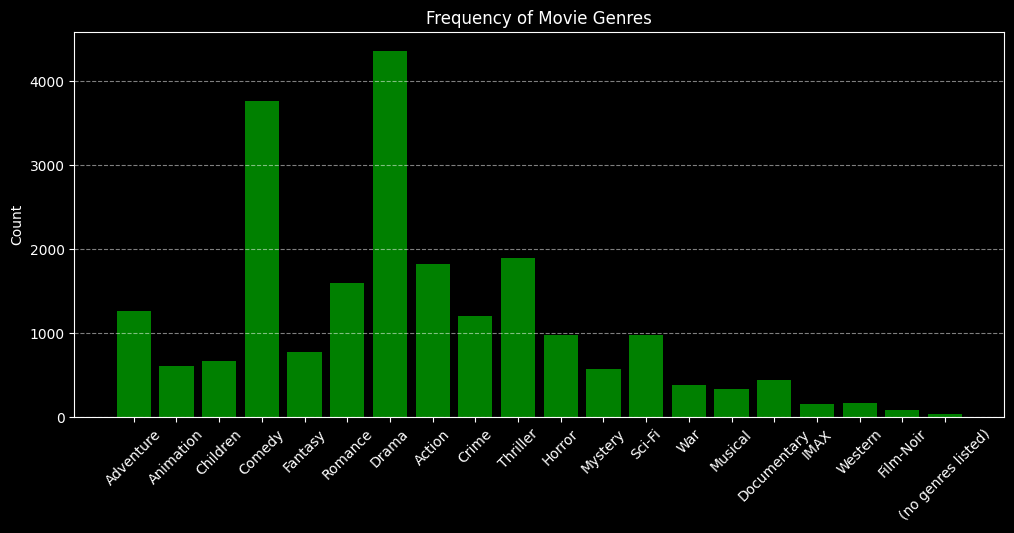

In [12]:
from collections import Counter

genre_counts = Counter()
for genre_list in movies['genres']:
    for genre in genre_list.split('|'):
        genre_counts[genre] += 1

# Sort genres by count
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

plt.figure(figsize=(12, 5))
plt.bar(genres, counts, color='green')
plt.title("Frequency of Movie Genres")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 3- Feature Engineering
- Prepare the raw data into a form that your recommender models can use effectively — especially for content-based and hybrid recommenders.

In [13]:
# Merge ratings with movie titles into single data frame
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [14]:
# Split genres and create binary columns
movies['genres'] = movies['genres'].str.split('|')
all_genres = set(g for sublist in movies['genres'] for g in sublist)

for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

In [15]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


TF-IDF (Term Frequency–Inverse Document Frequency) turns text data into numerical vectors.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['title'])

# Check the shape: (num_movies, num_features)
print(tfidf_matrix.shape)

(9742, 9053)


In [17]:
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()
movies = pd.merge(movies, movie_tags, on='movieId', how='left')
movies['tag'] = movies['tag'].fillna('')  # Replace NaNs

In [18]:
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
print(user_item_matrix.shape)

(610, 9724)


In [19]:
user_means = user_item_matrix.mean(axis=1)
normalized_matrix = user_item_matrix.sub(user_means, axis=0)

# 4- Content-Based Filtering (Using Cosine Similarity + TF-IDF)
- New users (no history) → cold start.
- Niche or rare items not yet widely rated.

1. TF-IDF Vectorization of Movie Titles (or Tags)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# If you've already done this during feature engineering, reuse it
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['title'])  # or movies['tag'] if available
print("TF-IDF shape:", tfidf_matrix.shape)

TF-IDF shape: (9742, 9053)


TF-IDF converts text into weighted word vectors.
Words like "the", "movie", "a" are ignored (stop words).
Similar movies will have closer vectors, e.g.:
“Harry Potter and the Chamber of Secrets”
“Harry Potter and the Prisoner of Azkaban”

2. Compute Cosine Similarity

In [21]:
from sklearn.metrics.pairwise import linear_kernel

# Compute cosine similarity matrix (linear_kernel is optimized for sparse data)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

- 1 means "very similar"
- 0 means "not similar"

3. Create Index Mapping for Movie Titles

In [22]:
# Create reverse index: title -> row index in tfidf_matrix
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

4. Define the Recommender Function

In [23]:
def recommend_movies(title, cosine_sim=cosine_sim, top_n=10):
    # Get index of the movie
    idx = indices.get(title)
    if idx is None:
        return "Movie not found."

    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N (excluding itself at index 0)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return titles
    return movies['title'].iloc[movie_indices].tolist()


Test the Recommender---->

In [24]:
recommend_movies("Toy Story (1995)")

['Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toy, The (1982)',
 'Toy Soldiers (1991)',
 'Now and Then (1995)',
 'Two Much (1995)',
 'Story of Us, The (1999)',
 'L.A. Story (1991)',
 "Pyromaniac's Love Story, A (1995)",
 "Kid's Story (2003)"]

# 5- Collaborative Filtering (SVD)

1. Build User-Item Matrix

In [26]:
# Pivot the ratings DataFrame
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Convert to NumPy matrix
R = user_item_matrix.values
user_ids = user_item_matrix.index.tolist()
movie_ids = user_item_matrix.columns.tolist()


2. Normalize Ratings (Subtract user mean)

In [27]:
user_ratings_mean = np.mean(R, axis=1).reshape(-1, 1)
R_demeaned = R - user_ratings_mean

3. Apply SVD using NumPy


In [28]:
# Perform Singular Value Decomposition
U, sigma, Vt = np.linalg.svd(R_demeaned, full_matrices=False)

# Reconstruct predicted ratings matrix
sigma_diag = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt) + user_ratings_mean

4. Recommend Movies for a User

In [29]:
def recommend_movies_collab(user_index, predicted_ratings, movie_ids, df_movies, n=10):
    # Get scores for this user
    user_row = predicted_ratings[user_index]

    # Movies the user has already rated
    rated_movies = R[user_index] > 0

    # Filter out already-rated movies
    unrated_indices = np.where(rated_movies == False)[0]

    # Sort remaining by predicted rating
    sorted_indices = unrated_indices[np.argsort(user_row[unrated_indices])[::-1]]

    # Get top N movie IDs
    top_movie_ids = [movie_ids[i] for i in sorted_indices[:n]]

    # Fetch movie titles
    top_movies = df_movies[df_movies['movieId'].isin(top_movie_ids)]

    return top_movies[['movieId', 'title']]


- For Testing

In [30]:
# Example: Recommend for user index 0 (userId = 1)
recommend_movies_collab(user_index=0, predicted_ratings=predicted_ratings, movie_ids=movie_ids, df_movies=movies)

,movieId,title
20,21,Get Shorty (1995)
277,318,"Shawshank Redemption, The (1994)"
315,357,Four Weddings and a Funeral (1994)
334,377,Speed (1994)
337,380,True Lies (1994)
472,539,Sleepless in Seattle (1993)
958,1259,Stand by Me (1986)
1232,1641,"Full Monty, The (1997)"
1284,1704,Good Will Hunting (1997)
1608,2150,"Gods Must Be Crazy, The (1980)"


# 6- Build Hybrid Recommendation System
- Goal : Combine the strengths of content-based filtering (based on movie features like title and genre) with the power of collaborative filtering (based on user ratings) to make smarter recommendations.

1. Normalize Both Score Matrices

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Normalize collaborative predictions (0 to 1)
scaler = MinMaxScaler()
collab_normalized = scaler.fit_transform(predicted_ratings)

# Normalize content similarity matrix (0 to 1)
content_normalized = scaler.fit_transform(cosine_sim)

2. Combine Scores (Weighted Average)

In [34]:
def hybrid_score(user_index, movie_index, alpha=0.5):
    # alpha: weight for content-based (0.5 = 50-50)
    collab_score = collab_normalized[user_index][movie_index]
    content_score = content_normalized[movie_index][movie_index]  # self-similarity is 1, or average similarity
    return alpha * content_score + (1 - alpha) * collab_score

3. Recommend Top-N Movies (Hybrid)

In [35]:
def recommend_hybrid(user_index, movie_ids, movies_df, top_n=10, alpha=0.5):
    scores = []

    for i in range(len(movie_ids)):
        if R[user_index][i] == 0:  # Movie not rated by user
            score = hybrid_score(user_index, i, alpha)
            scores.append((i, score))

    scores = sorted(scores, key=lambda x: x[1], reverse=True)[:top_n]
    top_indices = [i for i, s in scores]
    top_movie_ids = [movie_ids[i] for i in top_indices]

    return movies_df[movies_df['movieId'].isin(top_movie_ids)][['movieId', 'title']]

4. For testing

In [36]:
# Example: Recommend for user index 0
recommend_hybrid(user_index=0, movie_ids=movie_ids, movies_df=movies, alpha=0.5)

,movieId,title
4,5,Father of the Bride Part II (1995)
13,14,Nixon (1995)
34,38,It Takes Two (1995)
39,43,Restoration (1995)
41,45,To Die For (1995)
50,55,Georgia (1995)
57,64,Two if by Sea (1996)
81,92,Mary Reilly (1996)
150,178,Love & Human Remains (1993)
181,213,Burnt by the Sun (Utomlyonnye solntsem) (1994)
